In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [4]:
df = pd.read_csv("The_Cancer_data_1500_V2.csv")
print(df.head())

   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  


Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object 

(1500, 9) 


    Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1   


Features shape: (1500, 8)
Targ

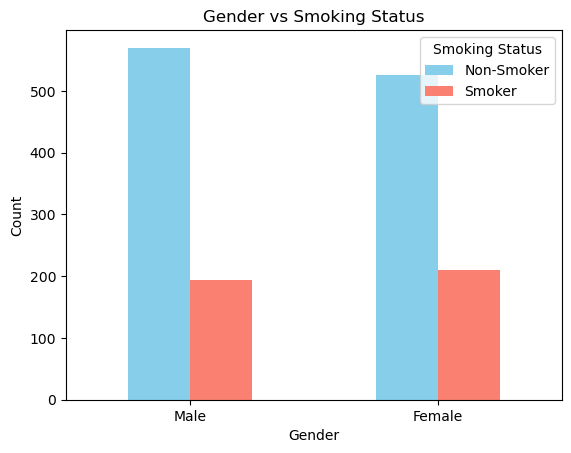

In [20]:
print(df.dtypes, '\n')
print(df.shape, '\n')
df.describe().T

print('\n', df.head(), '\n')

X = df.iloc[:, :8]  # Features (first 8 columns)
y = df.iloc[:, 8]   # Target (9th column)

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape, '\n')

def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

outliers_dict = {}
for feature in X:  
    if(feature == 'Age' or feature == 'BMI' or feature == 'PhysicalActivity' or feature == 'AlcoholIntake'):
        outliers = find_outliers(X[feature])
        outliers_dict[feature] = X[feature][outliers]
    
for feature, outliers in outliers_dict.items():
    print(f"Feature '{feature}' has {len(outliers)} outliers.")
    
print()

gender_counts = X['Gender'].value_counts()
num_males = gender_counts.get(0, 0)
num_females = gender_counts.get(1, 0)
print(f"Number of males: {num_males}")
print(f"Number of females: {num_females}\n")

smoker_counts = X['Smoking'].value_counts()
non_smoker = smoker_counts.get(0, 0)
num_smoker = smoker_counts.get(1, 0)
print(f"Number of smoker: {num_smoker}")
print(f"Number of non smoker: {non_smoker}\n")

gender_smoker_comparison = pd.crosstab(X['Gender'], X['Smoking'])
gender_smoker_comparison.index = ['Male', 'Female']
gender_smoker_comparison.columns = ['Non-Smoker', 'Smoker']
print(gender_smoker_comparison)
gender_smoker_comparison.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Gender vs Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.xticks(rotation=0)
plt.show()

In [126]:
# Training Under Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mse = root_mean_squared_error(y_test, y_hat)
r_sq = r2_score(y_test, y_hat)

print("MSE", mse)
print("R^2", r_sq)

MSE 0.11550648545777724
R^2 0.5129505392053995


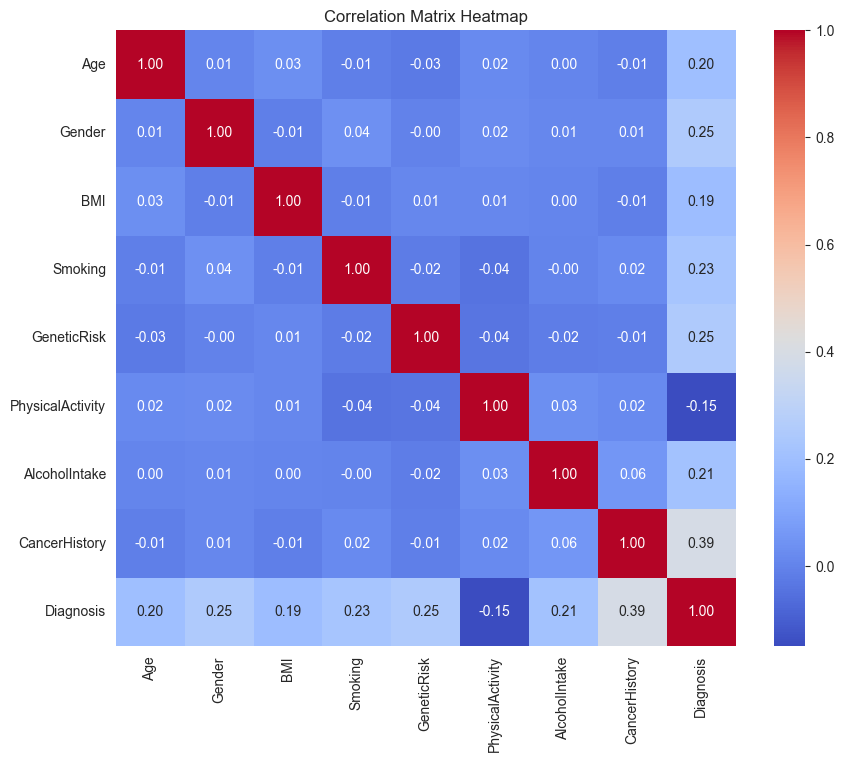

In [127]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

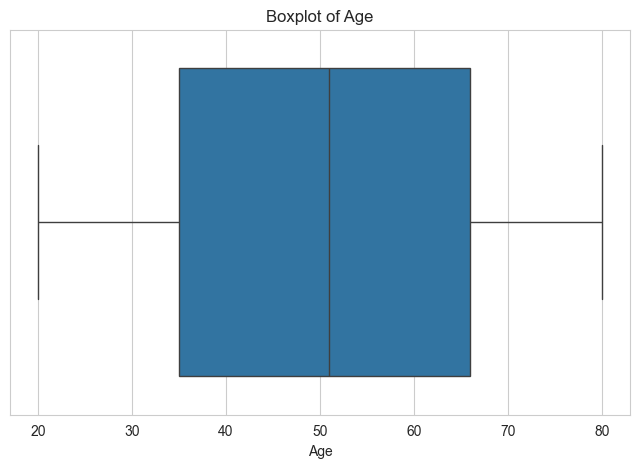

Feature 'Age' has 0 outliers.


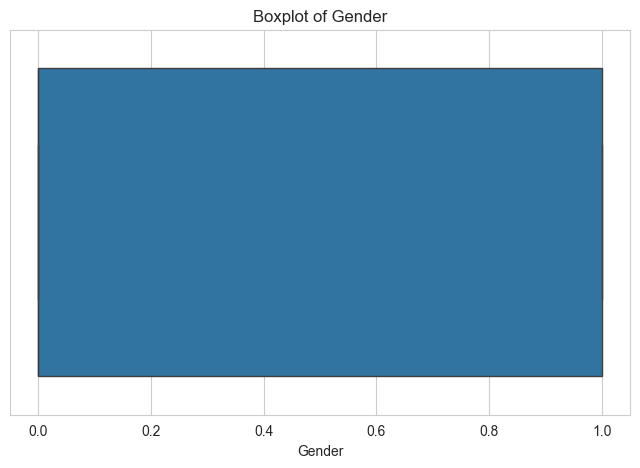

Feature 'Gender' has 0 outliers.


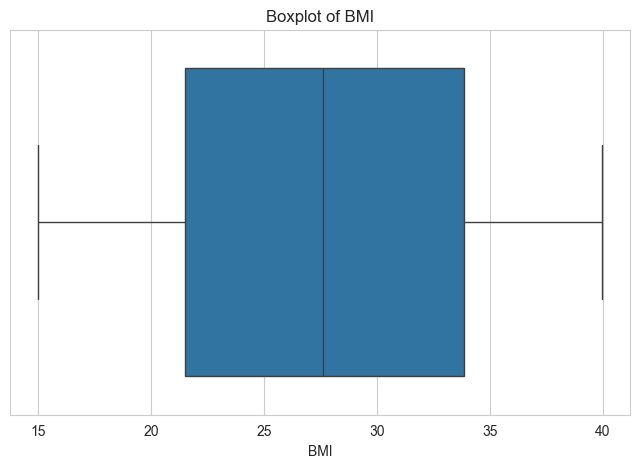

Feature 'BMI' has 0 outliers.


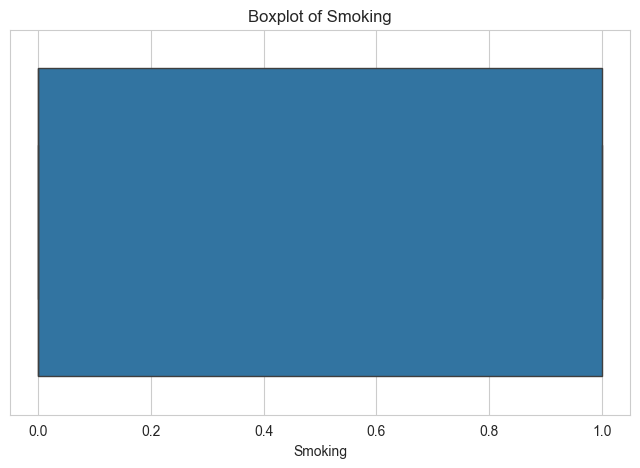

Feature 'Smoking' has 0 outliers.


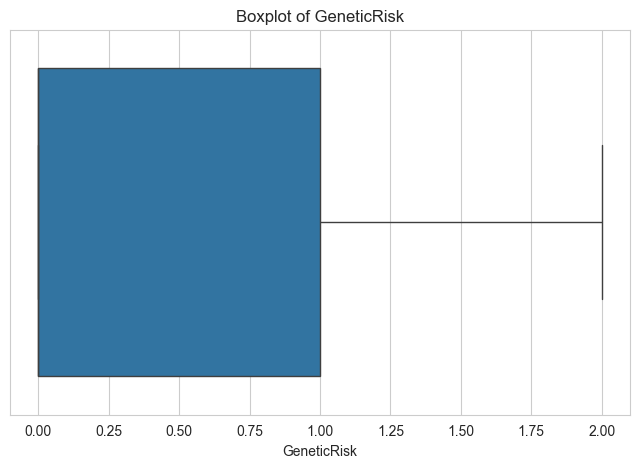

Feature 'GeneticRisk' has 0 outliers.


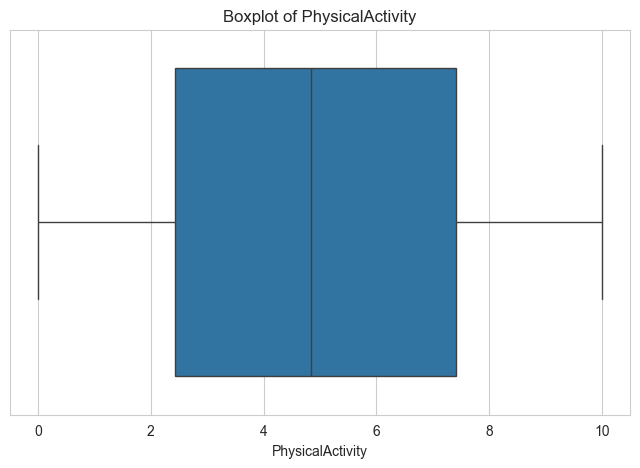

Feature 'PhysicalActivity' has 0 outliers.


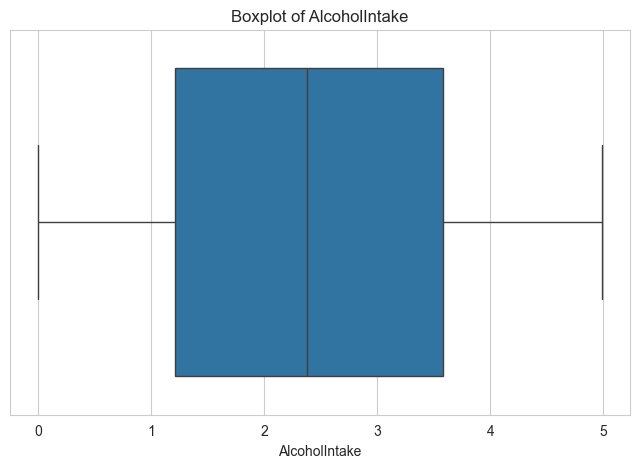

Feature 'AlcoholIntake' has 0 outliers.


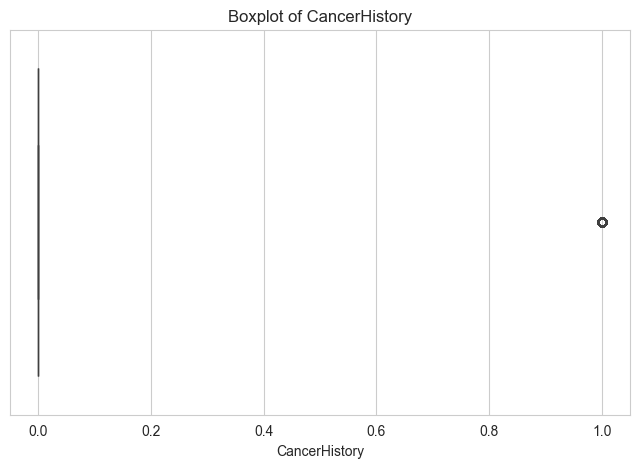

Feature 'CancerHistory' has 0 outliers.


In [128]:
for feature in X:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
    print(f"Feature '{feature}' has {len(outliers)} outliers.")

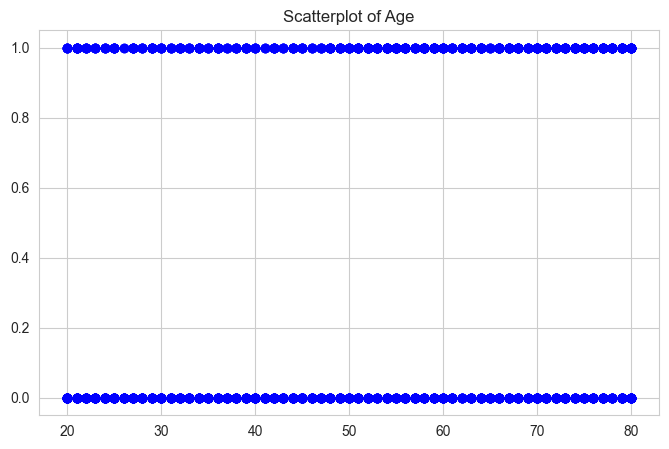

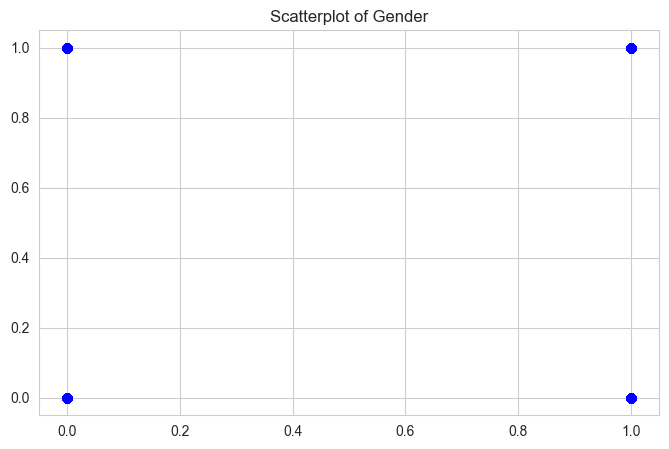

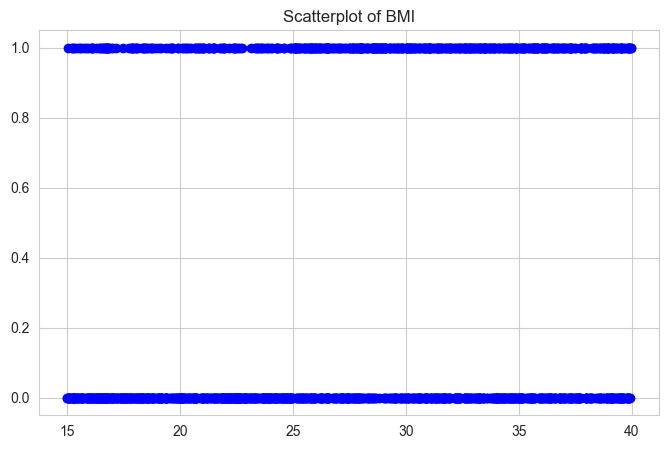

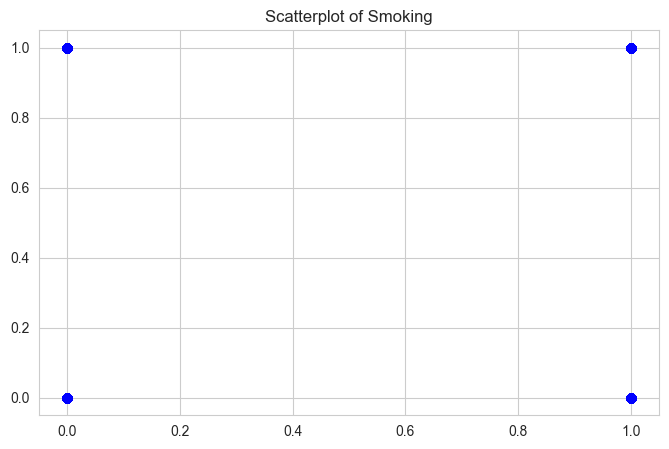

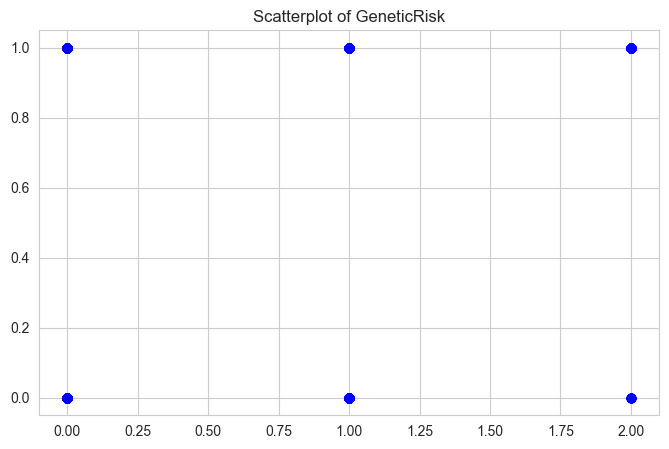

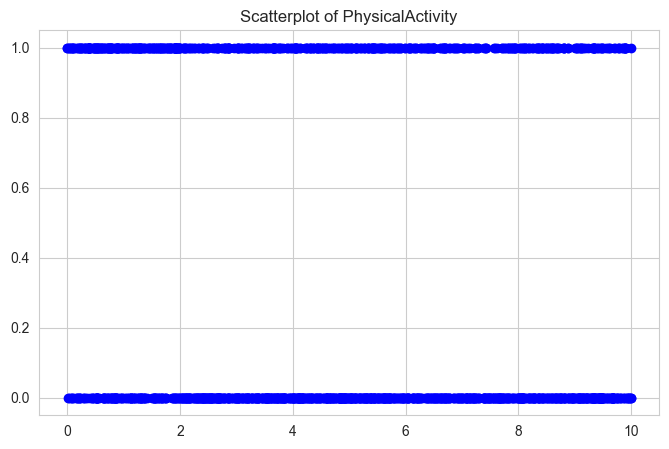

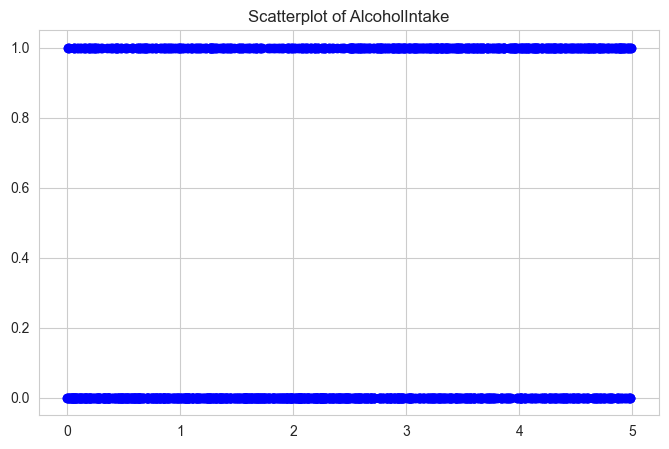

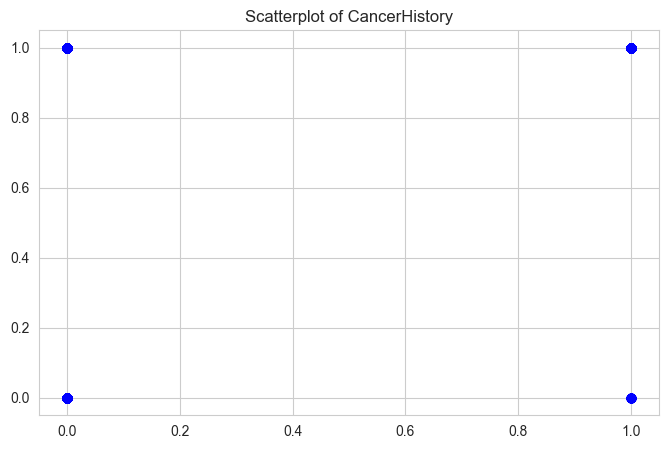

In [129]:
for feature in X:
    plt.figure(figsize=(8, 5))
    plt.scatter(x=X[feature],y=df.iloc[:, 8] , color='blue', label=f"'{feature}'")
    plt.title(f'Scatterplot of {feature}')
    plt.show()


In [130]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

There are no missing values in the Cancer_data_1500_V2.csv dataset.

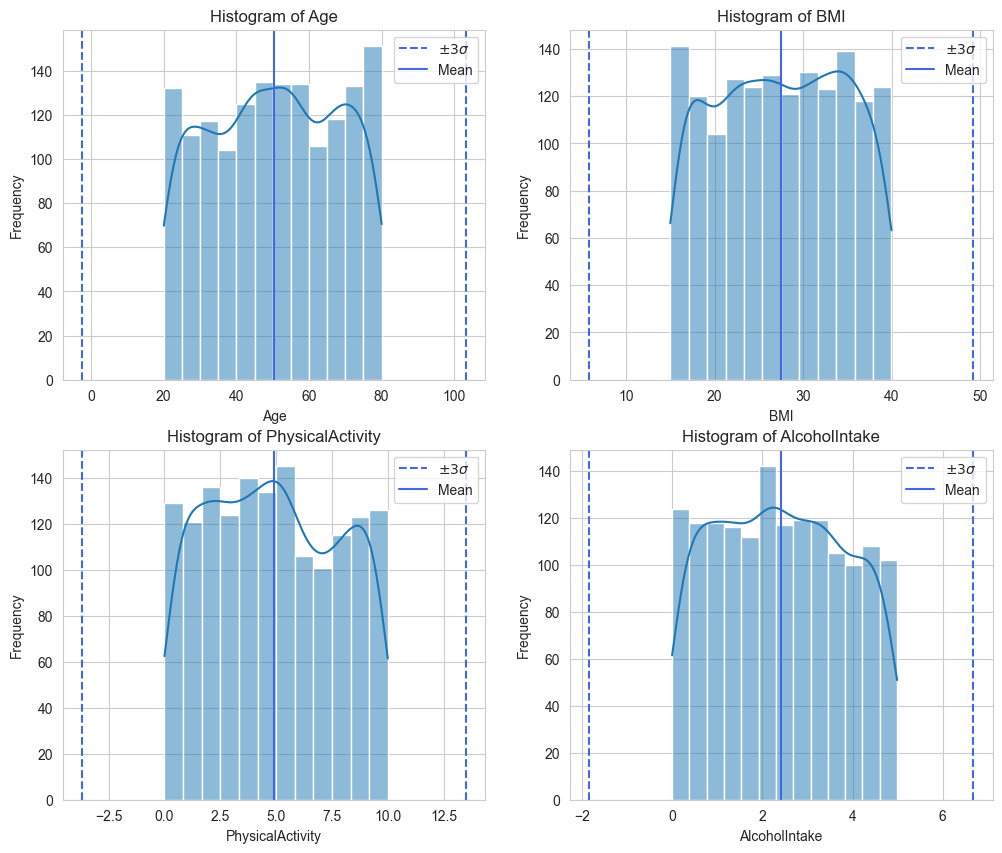

<Figure size 640x480 with 0 Axes>

In [131]:
# Empty list to store non-binary columns
nb_col = []

# Loop through each column in the dataframe to append to non-binary data to nb_col
for i in df.columns:
    if df[i].nunique() > 3:
        nb_col.append(i)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()
# Plot each non-binary column in the 2x2 grid
for i, feature in enumerate(nb_col):
    
    # Calculate mean and standard deviation for each feature
    mean = df[feature].mean()
    std_dev = df[feature].std()
    
    # Plot histogram with kernel density estimate (KDE)
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add 3 standard deviation boundaries and mean line
    axes[i].axvline(mean + 3 * std_dev, color='royalblue', linestyle='--', label='$\pm3\sigma$')
    axes[i].axvline(mean - 3 * std_dev, color='royalblue', linestyle='--')
    axes[i].axvline(mean, color='royalblue', linestyle='-', label = 'Mean')
    
    axes[i].legend()

plt.show()
plt.tight_layout()

Age, BMI, physical activity, and alcohol intake show a balanced distribution, with smooth Kernel Density Estimate (KDE) curves across all variables. The absence of sudden jumps or spikes suggests an even spread of data points, with no significant concentrations or gaps. Additionally, there are no outliers near the $\pm3\sigma$ boundaries, indicating that the data is clean and requires no further outlier handling.

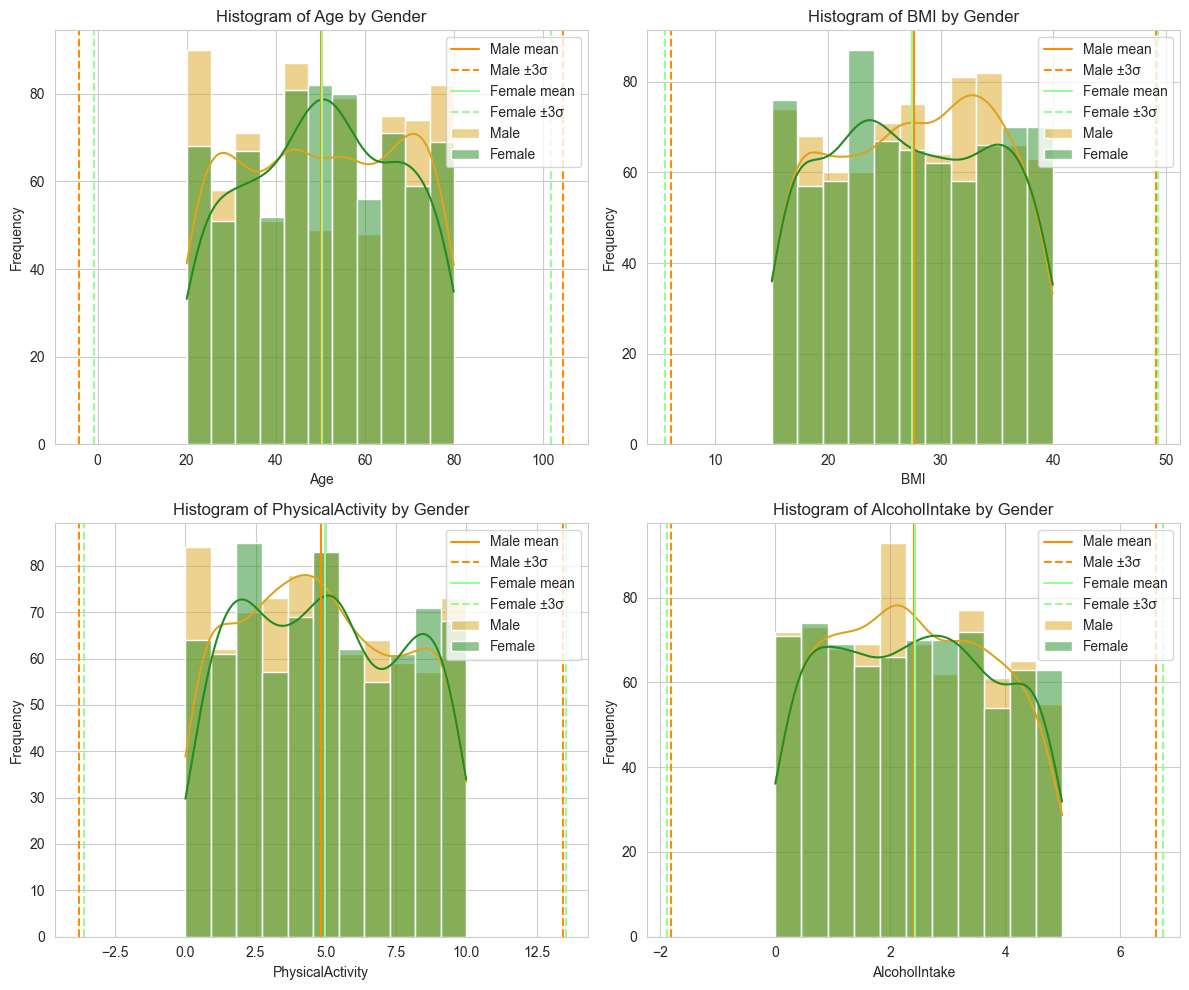

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each non-binary column in the 2x2 grid separated by gender
for i, feature in enumerate(nb_col):
    
    # Filter data by gender
    male = df[df['Gender'] == 0][feature]
    female = df[df['Gender'] == 1][feature]

    # Calculate mean and standard deviation for each gender
    mmean = male.mean()
    mstd = male.std()
    
    fmean = female.mean()
    fstd = female.std()
    
    # Plot histograms with KDE for each gender
    sns.histplot(male, kde=True, color='goldenrod', ax=axes[i], label='Male')
    sns.histplot(female, kde=True, color='forestgreen', ax=axes[i], label='Female')
    
    axes[i].set_title(f'Histogram of {feature} by Gender')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Plot mean and +/-3 standard deviation lines for Male
    axes[i].axvline(mmean, color='darkorange', linestyle='-', label ='Male mean')
    axes[i].axvline(mmean + 3 * mstd, color='darkorange', linestyle='--', label='Male ±3σ')
    axes[i].axvline(mmean - 3 * mstd, color='darkorange', linestyle='--', )
    
    # Plot mean and +/-3 standard deviation lines for Female
    axes[i].axvline(fmean, color='palegreen', linestyle='-', label ='Female mean')
    axes[i].axvline(fmean + 3 * fstd, color='palegreen', linestyle='--', label='Female ±3σ')
    axes[i].axvline(fmean - 3 * fstd, color='palegreen', linestyle='--')
    
    axes[i].legend()

plt.tight_layout()
plt.show()

Gender-based distributions reveal a broader spread for females compared to males in both age and BMI. Males show a higher concentration around 50 years for age and a BMI range of approximately 34–46. For alcohol intake, there is a subtle difference: males commonly consume around 2 units per week, while females have a slightly broader distribution. Notably, no outliers are present in any of these distributions.

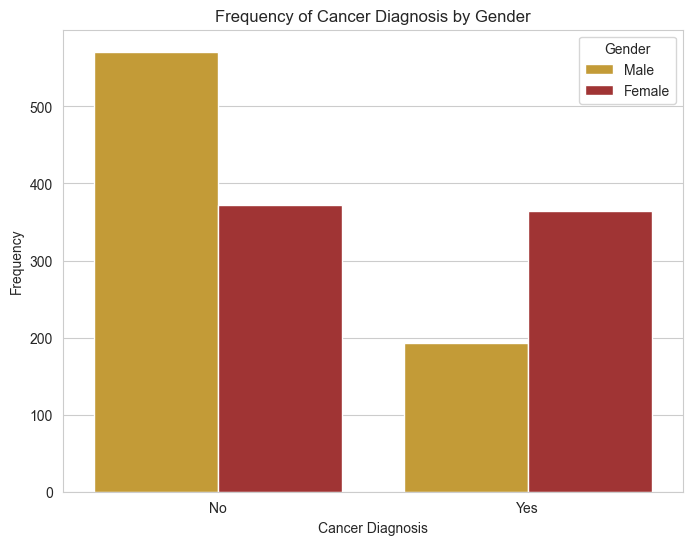

In [133]:
plt.figure(figsize=(8, 6))

# Plot the counts of cancer diagnosis by gender
#'Diagnosis' has values 1 for 'yes' and 0 for 'no', and 'Gender' has values 0 for male and 1 for female

sns.countplot(data=df, x='Diagnosis', hue='Gender', palette=['goldenrod', 'firebrick'])

plt.title("Frequency of Cancer Diagnosis by Gender")

plt.xlabel("Cancer Diagnosis")
plt.ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"])  # Labeling 0 as "No" and 1 as "Yes" for clarity

plt.legend(title='Gender', labels=['Male', 'Female'])

plt.show()

The frequency of individuals without cancer is higher among males than females, suggesting a larger proportion of males in this dataset testing negative for cancer. In contrast, females show a significantly higher frequency of cancer diagnoses, suggesting a potential gender disparity. This observed difference could be relevant and may warrant further investigation into gender-specific factors associated with cancer diagnosis.

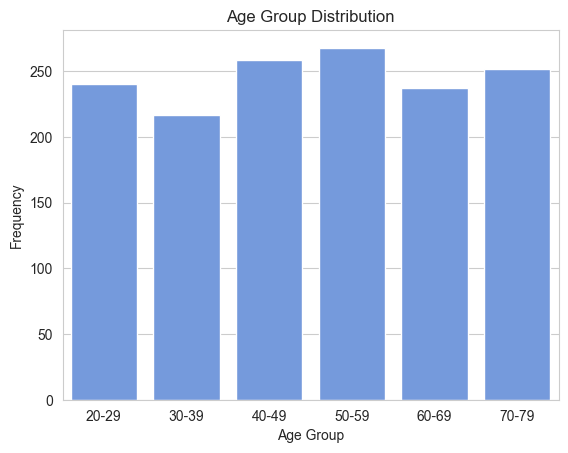

In [134]:
# Define age bins and labels
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new column with age categories
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot the count of each age group
sns.countplot(data=df, x='AgeGroup', color = "cornflowerblue")

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

plt.show()


The age group distribution of the Kaggle dataset, ranging from 20 to 79 years, shows a fairly balanced representation across all age categories. This balanced distribution ensures that the prediction model we are developing using algorithms such as linear regression, k-means clustering, random forests, and decision trees can infer potential age-related trends in cancer diagnosis without bias toward any particular age group. By including a well-represented range of ages, the model will be able to generalize more effectively while still allowing for age-specific-trends in cancer diagnosis. This thorough age representation supports our goal of identifying the best-performing model for accurately predicting cancer diagnosis across a diverse population.

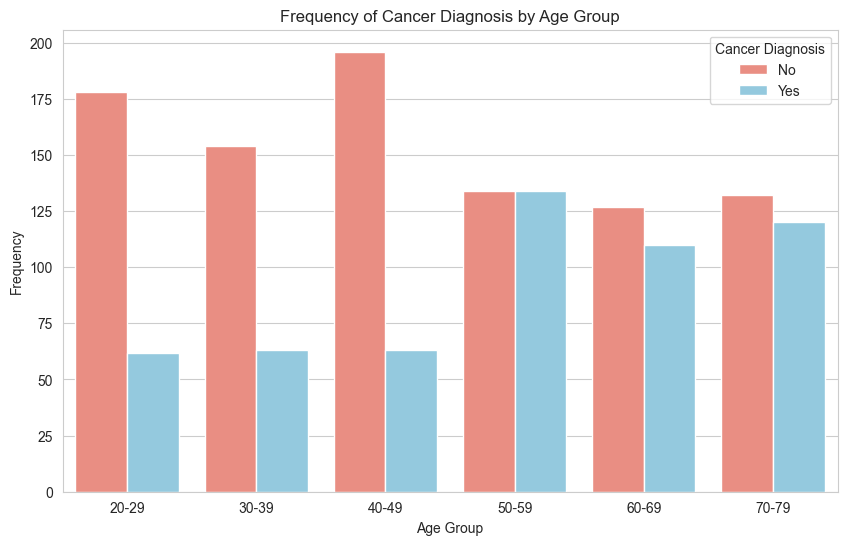

In [135]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='AgeGroup', hue='Diagnosis', palette=['salmon', 'skyblue'])

plt.title('Frequency of Cancer Diagnosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

plt.legend(title='Cancer Diagnosis', labels=['No', 'Yes'])

plt.show()

Age groups 50-59, 60-69, and 70-79 show cancer diagnosis rates that are closer to those testing negative, suggesting that the likelihood of a positive cancer diagnosis increases with age. In contrast, younger age groups (20-29, 30-39, and 40-49) have a substantially higher number of individuals testing negative. This overall trend highlights age as a significant factor in cancer diagnosis and underscores the potential benefit of age-specific interventions.